# Week 07 - Feature Selection

## An Introduction to Statistical Learning

* https://www.statlearning.com/
* https://github.com/JWarmenhoven/ISLR-python 

## Feature Selection

https://www.datasciencesmachinelearning.com/2019/10/feature-selection-filter-method-wrapper.html

* Filter Methods: Uses metrics such as correlation
* Wrapper Methods: Uses predictive algorithms to predictive power
* Embedded Methods: Selects features during model building

### Constant Features

In [1]:
# https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
import pandas as pd

grades = pd.read_csv('https://raw.githubusercontent.com/gitmystuff/INFO4050/main/Datasets/class-grades.csv', index_col=False)
print(grades.shape)
print(grades.head())

(98, 11)
   Prefix  Assignment  Tutorial  Midterm   Quiz  Final  Student  Attendance  \
0       5       57.14     34.09    64.38  64.38  52.50        1           0   
1       8       95.05    105.49    67.50  67.50  68.33        1           0   
2       8       83.70     83.17    30.00  30.00  48.89        1           0   
3       7       81.22     96.06    49.38  49.38  80.56        1           1   
4       8       91.32       NaN    95.00  95.00  73.89        1           1   

   FinalGrade  Activity 1  Activity 2  
0          54       79.46         NaN  
1          81       27.37         NaN  
2          55        2.50       13.57  
3          71       74.14         NaN  
4          89       83.36         NaN  


In [2]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(grades.drop('FinalGrade', axis=1), grades['FinalGrade'], test_size=.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(X_train.info())

(78, 10)
(20, 10)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 78 entries, 49 to 51
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Prefix      78 non-null     int64  
 1   Assignment  74 non-null     float64
 2   Tutorial    69 non-null     float64
 3   Midterm     74 non-null     float64
 4   Quiz        74 non-null     float64
 5   Final       75 non-null     float64
 6   Student     78 non-null     int64  
 7   Attendance  78 non-null     int64  
 8   Activity 1  78 non-null     float64
 9   Activity 2  75 non-null     float64
dtypes: float64(7), int64(3)
memory usage: 6.7 KB
None


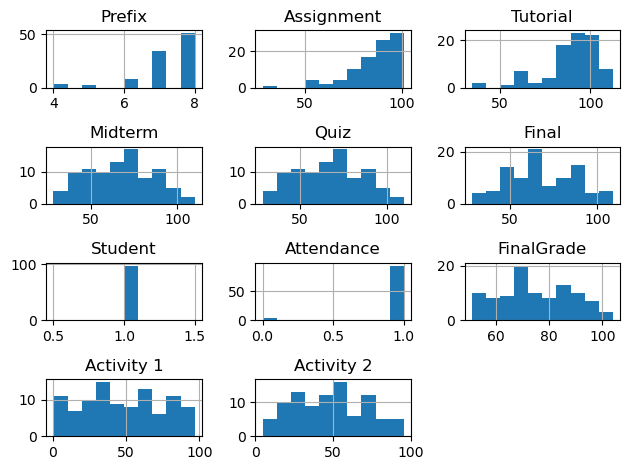

In [3]:
# look at the distributions
import matplotlib.pyplot as plt

grades.hist()
plt.tight_layout();

In [4]:
# fillna based on skewness https://www.statisticshowto.com/pearson-mode-skewness/
X_train['Assignment'].fillna(X_train['Assignment'].round(decimals=2).median(), inplace=True)
X_train['Tutorial'].fillna(X_train['Tutorial'].round(decimals=2).mode()[0], inplace=True)
X_train['Midterm'].fillna(X_train['Midterm'].round(decimals=2).mean(), inplace=True)
X_train['Quiz'].fillna(X_train['Quiz'].round(decimals=2).mean(), inplace=True)
X_train['Final'].fillna(X_train['Final'].round(decimals=2).mean(), inplace=True)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78 entries, 49 to 51
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Prefix      78 non-null     int64  
 1   Assignment  78 non-null     float64
 2   Tutorial    78 non-null     float64
 3   Midterm     78 non-null     float64
 4   Quiz        78 non-null     float64
 5   Final       78 non-null     float64
 6   Student     78 non-null     int64  
 7   Attendance  78 non-null     int64  
 8   Activity 1  78 non-null     float64
 9   Activity 2  75 non-null     float64
dtypes: float64(7), int64(3)
memory usage: 6.7 KB


In [5]:
# X_test uses data from X_train
X_test['Assignment'].fillna(X_train['Assignment'].round(decimals=2).median(), inplace=True)
X_test['Tutorial'].fillna(X_train['Tutorial'].round(decimals=2).mode()[0], inplace=True)
X_test['Midterm'].fillna(X_train['Midterm'].round(decimals=2).mean(), inplace=True)
X_test['Quiz'].fillna(X_train['Quiz'].round(decimals=2).mean(), inplace=True)
X_test['Final'].fillna(X_train['Final'].round(decimals=2).mean(), inplace=True)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 62 to 73
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Prefix      20 non-null     int64  
 1   Assignment  20 non-null     float64
 2   Tutorial    20 non-null     float64
 3   Midterm     20 non-null     float64
 4   Quiz        20 non-null     float64
 5   Final       20 non-null     float64
 6   Student     20 non-null     int64  
 7   Attendance  20 non-null     int64  
 8   Activity 1  20 non-null     float64
 9   Activity 2  18 non-null     float64
dtypes: float64(7), int64(3)
memory usage: 1.7 KB


In [6]:
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html
from sklearn.feature_selection import VarianceThreshold

varthresh = VarianceThreshold(threshold=0)
varthresh.fit(X_train)
sum(varthresh.get_support())

9

In [7]:
# print the variable names that have constant values, use ~ to exclude
print(X_train.columns[~varthresh.get_support()])

Index(['Student'], dtype='object')


In [8]:
# features to keep
feats_names = X_train.columns[varthresh.get_support()]
feats_names

Index(['Prefix', 'Assignment', 'Tutorial', 'Midterm', 'Quiz', 'Final',
       'Attendance', 'Activity 1', 'Activity 2'],
      dtype='object')

In [9]:
# transform dataset using variance threshold
print(X_train.shape, X_test.shape)
X_train = varthresh.transform(X_train)
X_test = varthresh.transform(X_test)
print(X_train.shape, X_test.shape)

(78, 10) (20, 10)
(78, 9) (20, 9)


In [10]:
# reconstruct dataframe
X_train = pd.DataFrame(X_train, columns = feats_names)
print(X_train.head())
print(X_train.tail())

   Prefix  Assignment  Tutorial     Midterm        Quiz   Final  Attendance  \
0     8.0       92.46     95.75   61.880000   61.880000   48.89         1.0   
1     8.0       90.98     97.55   86.250000   86.250000   90.00         1.0   
2     7.0      100.83    105.57  101.250000  101.250000  108.89         1.0   
3     7.0       93.83     95.43   65.067973   65.067973   90.00         1.0   
4     7.0       95.00     94.36   89.380000   89.380000   85.00         1.0   

   Activity 1  Activity 2  
0       41.07       38.97  
1       59.56       44.04  
2       94.29       87.70  
3       37.16       49.60  
4       13.43       24.20  
    Prefix  Assignment  Tutorial  Midterm   Quiz      Final  Attendance  \
73     8.0       71.79    102.87    41.88  41.88  68.852133         1.0   
74     8.0       93.59    103.83    92.50  92.50  87.220000         1.0   
75     8.0       91.13     89.08    44.38  44.38  35.830000         1.0   
76     7.0       95.60     82.28    76.88  76.88  78.3300

In [11]:
# alternative that works for categorical data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(grades.drop('FinalGrade', axis=1), grades['FinalGrade'], test_size=.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(X_train.info())

(78, 10)
(20, 10)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 78 entries, 49 to 51
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Prefix      78 non-null     int64  
 1   Assignment  74 non-null     float64
 2   Tutorial    69 non-null     float64
 3   Midterm     74 non-null     float64
 4   Quiz        74 non-null     float64
 5   Final       75 non-null     float64
 6   Student     78 non-null     int64  
 7   Attendance  78 non-null     int64  
 8   Activity 1  78 non-null     float64
 9   Activity 2  75 non-null     float64
dtypes: float64(7), int64(3)
memory usage: 6.7 KB
None


In [12]:
# convert all features to Object types
X_train = X_train.astype('O')
X_train.dtypes

Prefix        object
Assignment    object
Tutorial      object
Midterm       object
Quiz          object
Final         object
Student       object
Attendance    object
Activity 1    object
Activity 2    object
dtype: object

In [13]:
# use number of unique (nunique) to discover variance
no_var_feats = [
    feat for feat in X_train.columns if X_train[feat].nunique(dropna=False) == 1
]

print(no_var_feats)

['Student']


In [14]:
# drop the feature with no variance
X_train.drop(labels=no_var_feats, axis=1, inplace=True)
X_test.drop(labels=no_var_feats, axis=1, inplace=True)
X_train.shape, X_test.shape

((78, 9), (20, 9))

### Quasi-Constant Features

In [15]:
# start over
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(grades.drop('FinalGrade', axis=1), grades['FinalGrade'], test_size=.2, random_state=42)

X_train['Assignment'].fillna(X_train['Assignment'].round(decimals=2).median(), inplace=True)
X_train['Tutorial'].fillna(X_train['Tutorial'].round(decimals=2).mode()[0], inplace=True)
X_train['Midterm'].fillna(X_train['Midterm'].round(decimals=2).mean(), inplace=True)
X_train['Quiz'].fillna(X_train['Quiz'].round(decimals=2).mean(), inplace=True)
X_train['Final'].fillna(X_train['Final'].round(decimals=2).mean(), inplace=True)

X_test['Assignment'].fillna(X_train['Assignment'].round(decimals=2).median(), inplace=True)
X_test['Tutorial'].fillna(X_train['Tutorial'].round(decimals=2).mode()[0], inplace=True)
X_test['Midterm'].fillna(X_train['Midterm'].round(decimals=2).mean(), inplace=True)
X_test['Quiz'].fillna(X_train['Quiz'].round(decimals=2).mean(), inplace=True)
X_test['Final'].fillna(X_train['Final'].round(decimals=2).mean(), inplace=True)
print(X_train.shape, X_test.shape)
print(X_train.info())

(78, 10) (20, 10)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 78 entries, 49 to 51
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Prefix      78 non-null     int64  
 1   Assignment  78 non-null     float64
 2   Tutorial    78 non-null     float64
 3   Midterm     78 non-null     float64
 4   Quiz        78 non-null     float64
 5   Final       78 non-null     float64
 6   Student     78 non-null     int64  
 7   Attendance  78 non-null     int64  
 8   Activity 1  78 non-null     float64
 9   Activity 2  75 non-null     float64
dtypes: float64(7), int64(3)
memory usage: 6.7 KB
None


In [16]:
# using VarianceThreshold and retrieve names of features that don't have low variance
lo_var_feats = VarianceThreshold(threshold=0.1)
lo_var_feats.fit(X_train)
feat_names = X_train.columns[lo_var_feats.get_support()]
feat_names

Index(['Prefix', 'Assignment', 'Tutorial', 'Midterm', 'Quiz', 'Final',
       'Activity 1', 'Activity 2'],
      dtype='object')

In [17]:
# check percentages
X_train['Attendance'].value_counts() / float(len(X_train))

1    0.974359
0    0.025641
Name: Attendance, dtype: float64

In [18]:
# transform X_train and X_test
X_train = lo_var_feats.transform(X_train)
X_test = lo_var_feats.transform(X_test)
X_train.shape, X_test.shape

((78, 8), (20, 8))

In [19]:
# reconstruct dataframes
X_train = pd.DataFrame(X_train, columns=feat_names)
X_test = pd.DataFrame(X_test, columns=feat_names)
X_train.head()

,Prefix,Assignment,Tutorial,Midterm,Quiz,Final,Activity 1,Activity 2
0,8.0,92.46,95.75,61.880000,61.880000,48.89,41.07,38.97
1,8.0,90.98,97.55,86.250000,86.250000,90.00,59.56,44.04
2,7.0,100.83,105.57,101.250000,101.250000,108.89,94.29,87.70
3,7.0,93.83,95.43,65.067973,65.067973,90.00,37.16,49.60
4,7.0,95.00,94.36,89.380000,89.380000,85.00,13.43,24.20


In [20]:
# alternative method
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(grades.drop('FinalGrade', axis=1), grades['FinalGrade'], test_size=.2, random_state=42)

X_train['Assignment'].fillna(X_train['Assignment'].round(decimals=2).median(), inplace=True)
X_train['Tutorial'].fillna(X_train['Tutorial'].round(decimals=2).mode()[0], inplace=True)
X_train['Midterm'].fillna(X_train['Midterm'].round(decimals=2).mean(), inplace=True)
X_train['Quiz'].fillna(X_train['Quiz'].round(decimals=2).mean(), inplace=True)
X_train['Final'].fillna(X_train['Final'].round(decimals=2).mean(), inplace=True)

X_test['Assignment'].fillna(X_train['Assignment'].round(decimals=2).median(), inplace=True)
X_test['Tutorial'].fillna(X_train['Tutorial'].round(decimals=2).mode()[0], inplace=True)
X_test['Midterm'].fillna(X_train['Midterm'].round(decimals=2).mean(), inplace=True)
X_test['Quiz'].fillna(X_train['Quiz'].round(decimals=2).mean(), inplace=True)
X_test['Final'].fillna(X_train['Final'].round(decimals=2).mean(), inplace=True)
print(X_train.shape, X_test.shape)
print(X_train.info())

(78, 10) (20, 10)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 78 entries, 49 to 51
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Prefix      78 non-null     int64  
 1   Assignment  78 non-null     float64
 2   Tutorial    78 non-null     float64
 3   Midterm     78 non-null     float64
 4   Quiz        78 non-null     float64
 5   Final       78 non-null     float64
 6   Student     78 non-null     int64  
 7   Attendance  78 non-null     int64  
 8   Activity 1  78 non-null     float64
 9   Activity 2  75 non-null     float64
dtypes: float64(7), int64(3)
memory usage: 6.7 KB
None


In [21]:
# use std to detect variance
no_var_feats = [
    feat for feat in X_train.columns if X_train[feat].std() == 0
]

X_train.drop(labels=no_var_feats, axis=1, inplace=True)
X_test.drop(labels=no_var_feats, axis=1, inplace=True)
print(no_var_feats)
print(X_train.shape, X_test.shape)

['Student']
(78, 9) (20, 9)


In [22]:
# find low variance features
lo_var_feats = []
for feat in X_train.columns:
    lbl_pct = (X_train[feat].value_counts() / float(len(X_train))).sort_values(ascending=False).values[0]
    if lbl_pct > 0.90:
        lo_var_feats.append(feat)
        
lo_var_feats    

['Attendance']

In [23]:
# drop low variance features
X_train.drop(labels=lo_var_feats, axis=1, inplace=True)
X_test.drop(labels=lo_var_feats, axis=1, inplace=True)
X_train.head()

,Prefix,Assignment,Tutorial,Midterm,Quiz,Final,Activity 1,Activity 2
49,8,92.46,95.75,61.880000,61.880000,48.89,41.07,38.97
70,8,90.98,97.55,86.250000,86.250000,90.00,59.56,44.04
68,7,100.83,105.57,101.250000,101.250000,108.89,94.29,87.70
15,7,93.83,95.43,65.067973,65.067973,90.00,37.16,49.60
39,7,95.00,94.36,89.380000,89.380000,85.00,13.43,24.20


### Duplicate Features

In [24]:
# check for duplications
dup_feats = []
for i in range(0, len(X_train.columns)):
    orig = X_train.columns[i]

    for dupe in X_train.columns[i + 1:]:
        if X_train[orig].equals(X_train[dupe]):
            dup_feats.append(dupe)
            
dup_feats[0]

'Quiz'

In [25]:
# drop duplicate features
X_train.drop(dup_feats[0],  axis=1, inplace=True)
X_train.head()

,Prefix,Assignment,Tutorial,Midterm,Final,Activity 1,Activity 2
49,8,92.46,95.75,61.880000,48.89,41.07,38.97
70,8,90.98,97.55,86.250000,90.00,59.56,44.04
68,7,100.83,105.57,101.250000,108.89,94.29,87.70
15,7,93.83,95.43,65.067973,90.00,37.16,49.60
39,7,95.00,94.36,89.380000,85.00,13.43,24.20


### Correlation

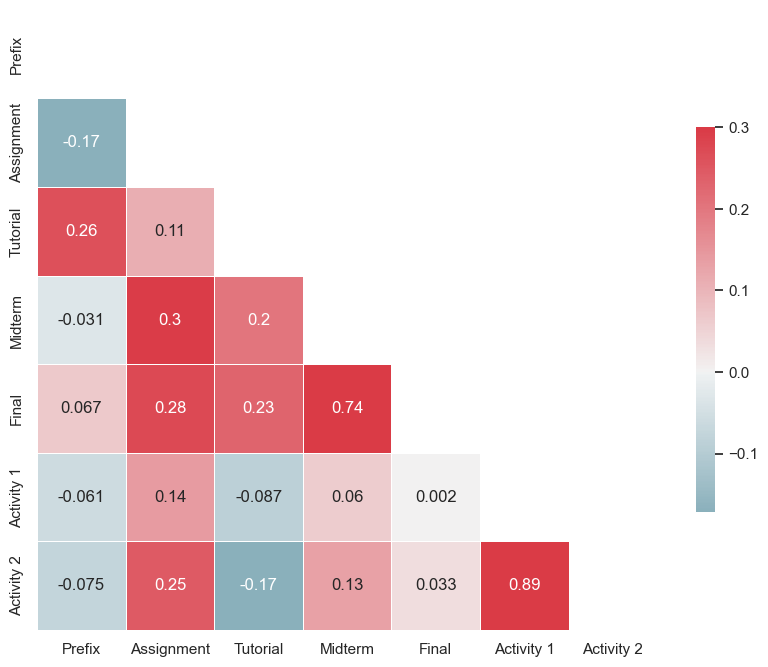

In [26]:
# the heatmap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='white')

# compute the correlation matrix
corr = X_train.corr(method='pearson')

# generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# set up the matplotlib figure
f, ax = plt.subplots(figsize=(10,10))

# generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={'shrink': .5}, annot=True);

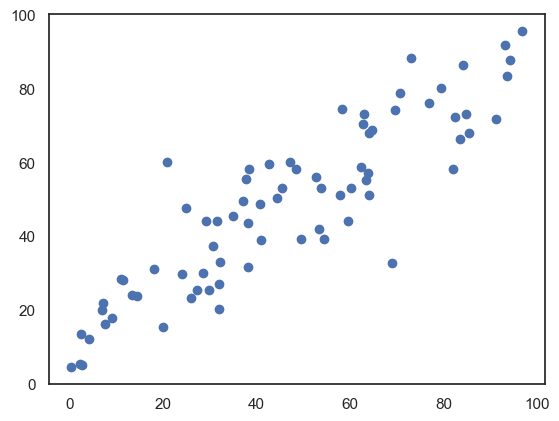

In [27]:
# scatterplot
import matplotlib.pyplot as plt

plt.scatter(X_train['Activity 1'], X_train['Activity 2']);

In [28]:
# build a correlation matrix
cormat = X_train.corr()
cormat = cormat.abs().unstack()
cormat = cormat.sort_values(ascending=False)
cormat = cormat[cormat >= 0]
cormat = cormat[cormat < 1]
cormat = pd.DataFrame(cormat).reset_index()
cormat.columns = ['Feature 1', 'Feature 2', 'Correlation']
cormat.head()

,Feature 1,Feature 2,Correlation
0,Activity 1,Activity 2,0.892699
1,Activity 2,Activity 1,0.892699
2,Final,Midterm,0.744133
3,Midterm,Final,0.744133
4,Assignment,Midterm,0.295571


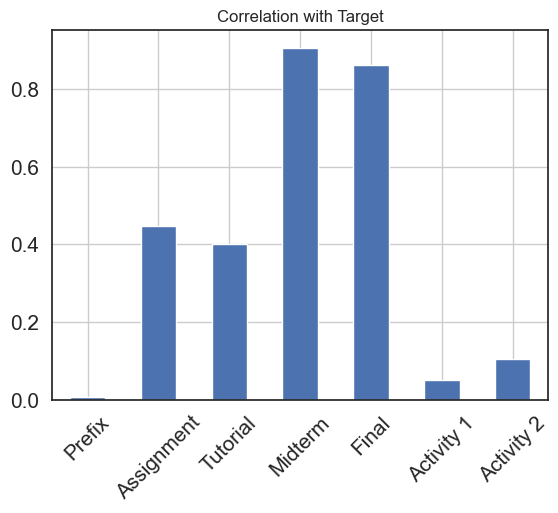

In [29]:
# show correlation of X_train with y_train
X_train.corrwith(y_train).plot.bar(
        title = "Correlation with Target", fontsize = 15,
        rot = 45, grid = True);

### Dropping Highly Correlated Features

* Feature with most missing values
* Use an algorithm to find which has more predictive power

In [30]:
# see missing values
grades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Prefix      98 non-null     int64  
 1   Assignment  94 non-null     float64
 2   Tutorial    87 non-null     float64
 3   Midterm     91 non-null     float64
 4   Quiz        91 non-null     float64
 5   Final       95 non-null     float64
 6   Student     98 non-null     int64  
 7   Attendance  98 non-null     int64  
 8   FinalGrade  98 non-null     int64  
 9   Activity 1  98 non-null     float64
 10  Activity 2  93 non-null     float64
dtypes: float64(7), int64(4)
memory usage: 8.5 KB


### Variance Inflation Factor

* Measures how much one predictor is influenced, or inflated, by the presence, or correlation, of another predictor
* Quick measure of the contribution of a predictor to the standard error, the standard deviation of a sample, in regression

https://www.statisticshowto.com/variance-inflation-factor/

In [31]:
# vif
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = [variance_inflation_factor(X_train.dropna().values, i) for i in range(len(X_train.columns))]

d = {'feature': X_train.columns.values, 'vif': vif_data}
vif = pd.DataFrame(d)
vif

,feature,vif
0,Prefix,51.105832
1,Assignment,59.345930
2,Tutorial,67.700057
3,Midterm,31.926943
4,Final,35.011636
5,Activity 1,20.684142
6,Activity 2,30.450451


### Mutual Information

* Measures the mutual dependence on two variables
* Persons r is linear where as MI measures non-linear relationships
* How much information can be extracted from one variable by observing another variable


In [32]:
X_train.isnull().sum()

Prefix        0
Assignment    0
Tutorial      0
Midterm       0
Final         0
Activity 1    0
Activity 2    3
dtype: int64

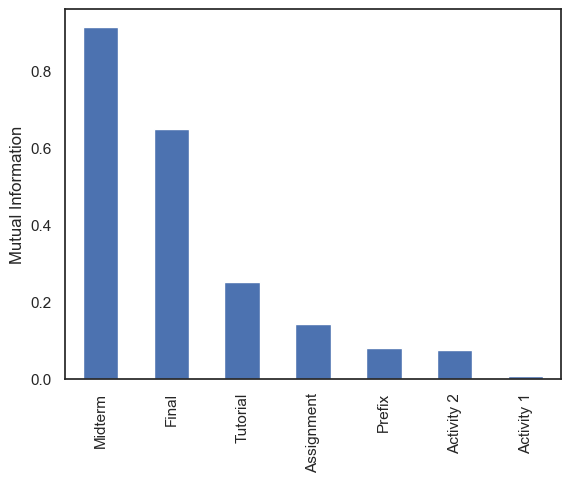

In [33]:
# obtain the mutual information values and select features
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectPercentile

X_train['Activity 2'].fillna(X_train['Activity 2'].round(decimals=2).mean(), inplace=True)
X_test['Activity 2'].fillna(X_test['Activity 2'].round(decimals=2).mean(), inplace=True)

mi = mutual_info_regression(X_train, y_train)
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False).plot.bar()
plt.ylabel('Mutual Information');

In [34]:
# Select the features in the top percentile
mi_perc = SelectPercentile(mutual_info_regression, percentile=20).fit(X_train, y_train)
X_train.columns[mi_perc.get_support()]

Index(['Midterm', 'Final'], dtype='object')